In [5]:
from openfe_benchmarks import p38
from openfe.setup.atom_mapping.perses_mapper import PersesAtomMapper

In [4]:
tyk2_system = p38.get_old_system()

In [14]:
PersesAtomMapper??

In [8]:
p38_perses_system = p38.get_old_system(mappers=[PersesAtomMapper(),])

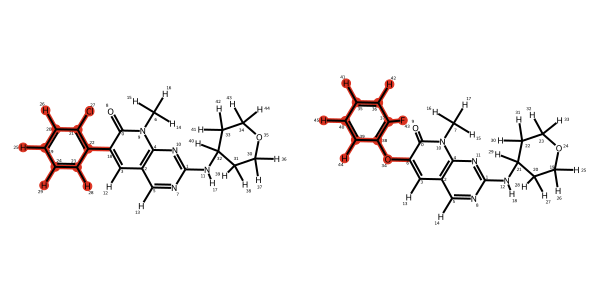

In [21]:
edges = [edge for edge in p38_perses_system.ligand_network.edges]
for edge in edges:
    if edge.componentA.name == 'lig_p38a_2g' or edge.componentA.name == 'lig_p38a_2c':
        if edge.componentB.name == 'lig_p38a_2g' or edge.componentB.name == 'lig_p38a_2c':
            display(edge)

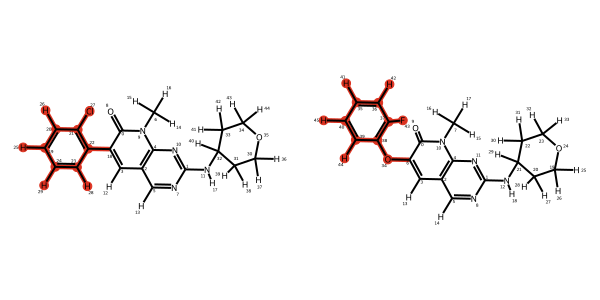

In [22]:
edges = [edge for edge in tyk2_system.ligand_network.edges]
for edge in edges:
    if edge.componentA.name == 'lig_p38a_2g' or edge.componentA.name == 'lig_p38a_2c':
        if edge.componentB.name == 'lig_p38a_2g' or edge.componentB.name == 'lig_p38a_2c':
            display(edge)

In [17]:
from openfe_benchmarks.utils import show_edge_3D
show_edge_3D(edges[1], spheres=False, shift=(0,0,0))

AttributeError: 'LigandAtomMapping' object has no attribute 'molA'

In [5]:
from openfe.setup.methods.openmm.equil_rbfe_methods import RelativeLigandTransform
from openff.units import unit

settings = RelativeLigandTransform.get_default_settings()

settings.simulation_settings.equilibration_length = 1000 * unit.picosecond
settings.simulation_settings.production_length = 5000 * unit.picosecond

In [6]:
import pprint
pprint.pprint(settings)

RelativeLigandTransformSettings(system_settings=SystemSettings(constraints='HBonds', hydrogen_mass=None, nonbonded_method='PME', nonbonded_cutoff=<Quantity(1.0, 'nanometer')>, rigid_water=True, remove_com=True), topology_settings=TopologySettings(forcefield={'protein': 'amber99sb.xml', 'ligand': 'openff-2.0.0.offxml', 'solvent': 'tip3p.xml'}, solvent_model='tip3p'), alchemical_settings=AlchemicalSettings(lambda_functions='default', lambda_windows=11, unsampled_endstates=False, use_dispersion_correction=False, softcore_LJ_v2=True, softcore_electrostatics=True, softcore_alpha=0.85, softcore_electrostatics_alpha=0.3, softcore_sigma_Q=1.0, interpolate_old_and_new_14s=False, flatten_torsions=False), integrator_settings=IntegratorSettings(timestep=<Quantity(2, 'femtosecond')>, temperature=<Quantity(298.15, 'kelvin')>, collision_rate=<Quantity(1, '1 / picosecond')>, n_steps=<Quantity(1000, 'timestep')>, reassign_velocities=True, splitting='V R O R V', n_restart_attempts=20, constraint_toleran

In [7]:
import copy
from openfe.setup import ChemicalSystem

solvent_transforms = []

for edge in edges:
    stateA = ChemicalSystem({'ligand': edge.molA,
                             'solvent': tyk2_system.solvent_component})
    stateB = ChemicalSystem({'ligand': edge.molB,
                             'solvent': tyk2_system.solvent_component})
    simset = copy.deepcopy(settings)
    simset.simulation_settings.output_filename = f"{edge.molA.name}_{edge.molB.name}_solvent.nc"
    simset.simulation_settings.checkpoint_storage = f"{edge.molA.name}_{edge.molB.name}_solvent_checkpoint.nc"
    transform = RelativeLigandTransform(
        stateA=stateA, stateB=stateB, ligandmapping=edge,
        settings=simset
    )
    solvent_transforms.append(transform)

In [8]:
import copy
from openfe.setup import ChemicalSystem

complex_transforms = []

for edge in edges:
    stateA = ChemicalSystem({'ligand': edge.molA,
                             'solvent': tyk2_system.solvent_component,
                             'protein': tyk2_system.protein_component})
    stateB = ChemicalSystem({'ligand': edge.molB,
                             'solvent': tyk2_system.solvent_component,
                             'protein': tyk2_system.protein_component})
    simset = copy.deepcopy(settings)
    simset.simulation_settings.output_filename = f"{edge.molA.name}_{edge.molB.name}_complex.nc"
    simset.simulation_settings.checkpoint_storage = f"{edge.molA.name}_{edge.molB.name}_complex_checkpoint.nc"
    transform = RelativeLigandTransform(
        stateA=stateA, stateB=stateB, ligandmapping=edge,
        settings=simset
    )
    complex_transforms.append(transform)

In [ ]:
#NBVAL_IGNORE_OUTPUT
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [ ]:
#NBVAL_IGNORE_OUTPUT
#solvent_transforms[2].run(verbose=True)

for sim in solvent_transforms:
    sim.run(dry=True, verbose=True)

In [ ]:
#NBVAL_IGNORE_OUTPUT
complex_transforms[2].run(verbose=True)